In [1]:
!pip install requests pandas openpyxl matplotlib


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [11]:
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 10,
    'page': 1,
    'sparkline': 'false'
}

response = requests.get(url, params=params)
data = response.json()

# Preview the first item
data[0]


{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400',
 'current_price': 118933,
 'market_cap': 2366634142314,
 'market_cap_rank': 1,
 'fully_diluted_valuation': 2366634142314,
 'total_volume': 44795598676,
 'high_24h': 119026,
 'low_24h': 117498,
 'price_change_24h': 25.69,
 'price_change_percentage_24h': 0.0216,
 'market_cap_change_24h': 201028363,
 'market_cap_change_percentage_24h': 0.00849,
 'circulating_supply': 19898915.0,
 'total_supply': 19898915.0,
 'max_supply': 21000000.0,
 'ath': 122838,
 'ath_change_percentage': -3.26638,
 'ath_date': '2025-07-14T07:56:01.937Z',
 'atl': 67.81,
 'atl_change_percentage': 175135.77154,
 'atl_date': '2013-07-06T00:00:00.000Z',
 'roi': None,
 'last_updated': '2025-07-29T08:00:13.586Z'}

In [12]:
df = pd.DataFrame(data)

# Let's keep only the most important columns
df = df[[
    'id',
    'symbol',
    'name',
    'current_price',
    'market_cap',
    'total_volume',
    'price_change_percentage_24h'
]]

# Add a timestamp for when this data was pulled
df['timestamp'] = datetime.now()

df.head()


,id,symbol,name,current_price,market_cap,total_volume,price_change_percentage_24h,timestamp
0,bitcoin,btc,Bitcoin,118933.000000,2366634142314,44795598676,0.02160,2025-07-29 13:31:22.306242
1,ethereum,eth,Ethereum,3874.270000,467666188209,34187822937,-0.41828,2025-07-29 13:31:22.306242
2,ripple,xrp,XRP,3.170000,188017600993,6404954462,-3.08179,2025-07-29 13:31:22.306242
3,tether,usdt,Tether,0.999947,163648933611,106030323975,-0.01088,2025-07-29 13:31:22.306242
4,binancecoin,bnb,BNB,827.720000,115292212751,2650069951,-3.07860,2025-07-29 13:31:22.306242


In [13]:
output_path = "crypto_data.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Data saved to {output_path}")


✅ Data saved to crypto_data.xlsx


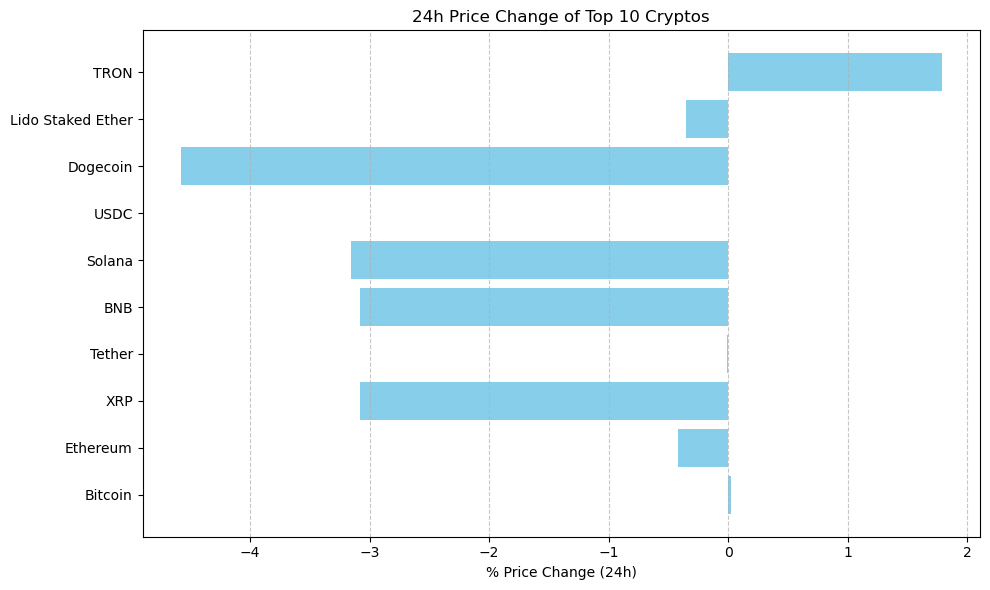

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(df['name'], df['price_change_percentage_24h'], color='skyblue')
plt.xlabel('% Price Change (24h)')
plt.title('24h Price Change of Top 10 Cryptos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
